In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [2]:
df = df = pd.read_csv('Healthcare_Risk.csv')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                25500 non-null  float64
 1   Gender             25500 non-null  object 
 2   Medical Condition  25500 non-null  object 
 3   Glucose            25500 non-null  float64
 4   Blood Pressure     25500 non-null  float64
 5   BMI                30000 non-null  float64
 6   Oxygen Saturation  30000 non-null  float64
 7   LengthOfStay       30000 non-null  int64  
 8   Cholesterol        30000 non-null  float64
 9   Triglycerides      30000 non-null  float64
 10  HbA1c              30000 non-null  float64
 11  Smoking            30000 non-null  int64  
 12  Alcohol            30000 non-null  int64  
 13  Physical Activity  30000 non-null  float64
 14  Diet Score         30000 non-null  float64
 15  Family History     30000 non-null  int64  
 16  Stress Level       300

In [4]:
print(df.head(10))

    Age  Gender Medical Condition  Glucose  Blood Pressure    BMI  \
0  46.0    Male          Diabetes   137.04          135.27  28.90   
1  22.0    Male           Healthy    71.58          113.27  26.29   
2  50.0     NaN            Asthma    95.24             NaN  22.53   
3  57.0     NaN           Obesity      NaN          130.53  38.47   
4  66.0  Female      Hypertension    95.15          178.17  31.12   
5  50.0    Male      Hypertension   107.00          171.80  25.33   
6  80.0    Male      Hypertension      NaN          174.52  29.87   
7  50.0    Male            Cancer      NaN          136.13  26.37   
8  60.0  Female           Obesity      NaN             NaN  35.49   
9  13.0  Female            Asthma    90.60          126.88  29.24   

   Oxygen Saturation  LengthOfStay  Cholesterol  Triglycerides  HbA1c  \
0              96.04             6       231.88         210.56   7.61   
1              97.54             2       165.57         129.41   4.91   
2              90.31 

In [5]:
print(df.isnull().sum())

Age                  4500
Gender               4500
Medical Condition    4500
Glucose              4500
Blood Pressure       4500
BMI                     0
Oxygen Saturation       0
LengthOfStay            0
Cholesterol             0
Triglycerides           0
HbA1c                   0
Smoking                 0
Alcohol                 0
Physical Activity       0
Diet Score              0
Family History          0
Stress Level            0
Sleep Hours             0
random_notes            0
noise_col               0
dtype: int64


In [6]:
df = df.drop(['random_notes','noise_col'],axis=1)
df = df.dropna(subset = ['Medical Condition','Age','Gender'])

In [7]:
index = ['Age','Blood Pressure','Glucose','BMI','Oxygen Saturation','Cholesterol','Sleep Hours','Physical Activity','Stress Level']

df[index] = df[index].where(df[index] >= 0, 0)
df['Glucose'] = df['Glucose'].fillna(df.groupby('Medical Condition')['Glucose'].transform('mean'))
df['Blood Pressure'] = df['Blood Pressure'].fillna(df.groupby('Medical Condition')['Blood Pressure'].transform('mean'))
df=df[((df['Glucose'] > 0) & (df['Blood Pressure'] > 0)) & df['Sleep Hours'] > 0]


In [8]:
df['penyakit'] = np.where(
    df['Medical Condition'].str.lower() == 'healthy', 'Negatif','Positif'
)

In [9]:
print(df.values)

[[46.0 'Male' 'Diabetes' ... 5.07 6.05 'Positif']
 [22.0 'Male' 'Healthy' ... 5.87 7.72 'Negatif']
 [66.0 'Female' 'Hypertension' ... 6.38 6.64 'Positif']
 ...
 [41.0 'Male' 'Asthma' ... 6.72 2.81 'Positif']
 [41.0 'Male' 'Diabetes' ... 7.1 5.8 'Positif']
 [46.0 'Female' 'Hypertension' ... 3.64 5.47 'Positif']]


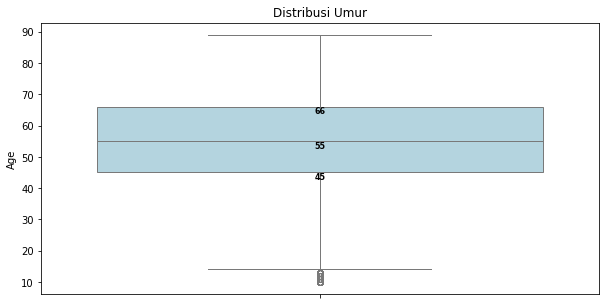

In [10]:
plt.figure(figsize = (10,5))
sns.boxplot(y = df['Age'],color = 'lightblue')
plt.title('Distribusi Umur')
plt.ylabel('Age')
plt.tight_layout

iqr = df['Age'].quantile(0.75) -  df['Age'].quantile(0.25)
lower_whisker =  df['Age'].quantile(0.25) - 1.5 * iqr
higher_whisker = df['Age'].quantile(0.75) + 1.5 * iqr


stats = df['Age'].describe()
plt.text(0,stats['50%'], f"{stats['50%']:.0f}",ha = 'center' ,va ='top', fontsize = 8, color = 'black', fontweight = 'bold')
plt.text(0,stats['75%'], f"{stats['75%']:.0f}",ha = 'center' ,va ='top', fontsize = 8, color = 'black', fontweight = 'bold')
plt.text(0,stats['25%'], f"{stats['25%']:.0f}",ha = 'center' ,va ='top', fontsize = 8, color = 'black', fontweight = 'bold')

plt.show()

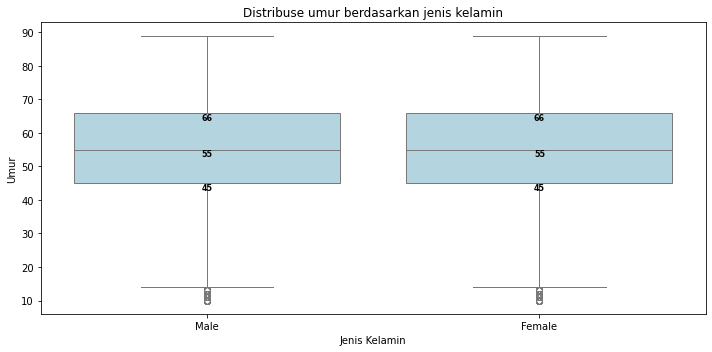

In [11]:
plt.figure(figsize = (10,5))
ax = sns.boxplot(data = df, x='Gender', y='Age', color = 'lightblue')
plt.title("Distribuse umur berdasarkan jenis kelamin")
plt.xlabel('Jenis Kelamin')
plt.ylabel('Umur')
plt.tight_layout()

stats = df.groupby('Gender')['Age'].describe()
stats_boxplot = [t.get_text() for t in ax.get_xticklabels()]

for i, gender in enumerate(stats_boxplot):
    s = stats.loc[gender]
    plt.text(i,s['50%'],f"{s['50%']:.0f}",ha = 'center' ,va ='top', fontsize = 8, color = 'black', fontweight = 'bold')
    plt.text(i,s['25%'],f"{s['25%']:.0f}",ha = 'center' ,va ='top', fontsize = 8, color = 'black', fontweight = 'bold')
    plt.text(i,s['75%'],f"{s['75%']:.0f}",ha = 'center' ,va ='top', fontsize = 8, color = 'black', fontweight = 'bold')


plt.show()
    

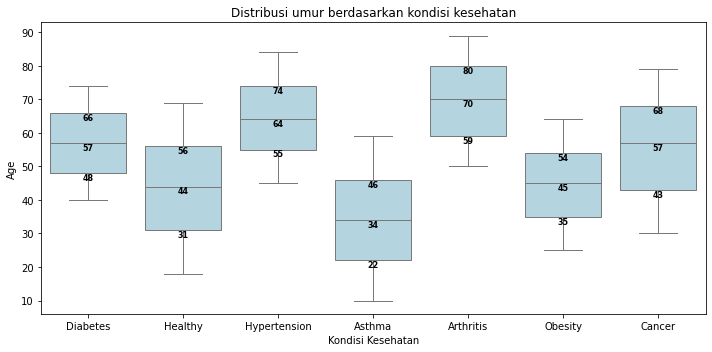

In [12]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df, x='Medical Condition', y= 'Age', color = 'lightblue')
plt.title("Distribusi umur berdasarkan kondisi kesehatan")
plt.xlabel("Kondisi Kesehatan")
plt.ylabel("Age")
plt.tight_layout()

stats = df.groupby('Medical Condition')['Age'].describe()
stats_boxplot = [t.get_text() for t in plt.gca().get_xticklabels()]

for i, kondisi in enumerate(stats_boxplot):
    s = stats.loc[kondisi]
    plt.text(i,s['50%'],f"{s['50%']:.0f}",ha = 'center' ,va ='top', fontsize = 8, color = 'black', fontweight = 'bold')
    plt.text(i,s['25%'],f"{s['25%']:.0f}",ha = 'center' ,va ='top', fontsize = 8, color = 'black', fontweight = 'bold')
    plt.text(i,s['75%'],f"{s['75%']:.0f}",ha = 'center' ,va ='top', fontsize = 8, color = 'black', fontweight = 'bold')


plt.show()

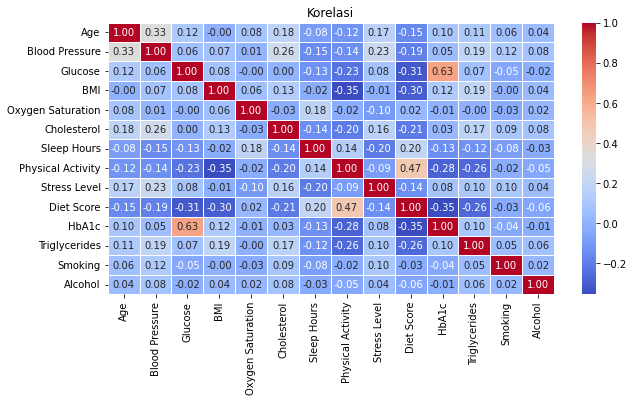

In [24]:
matrix = df[['Age','Blood Pressure','Glucose','BMI','Oxygen Saturation','Cholesterol','Sleep Hours','Physical Activity','Stress Level','Diet Score','HbA1c','Triglycerides','Smoking','Alcohol']].copy()
matrix = matrix.corr()

plt.figure(figsize = (10,5))
sns.heatmap(matrix,annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Korelasi')
plt.show()


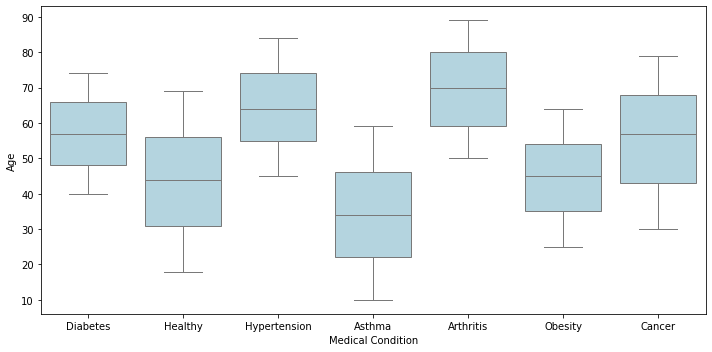

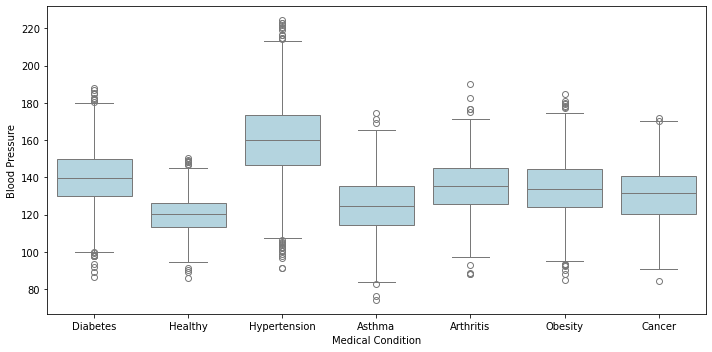

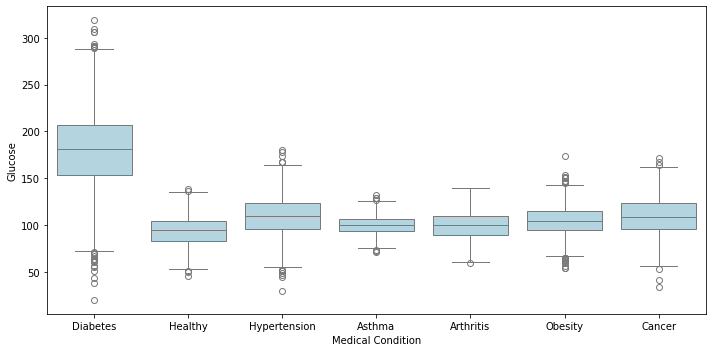

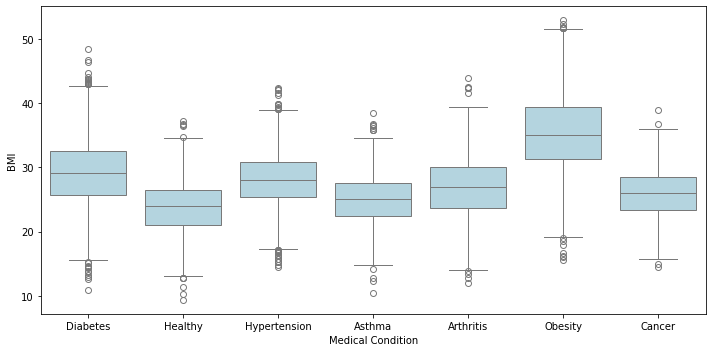

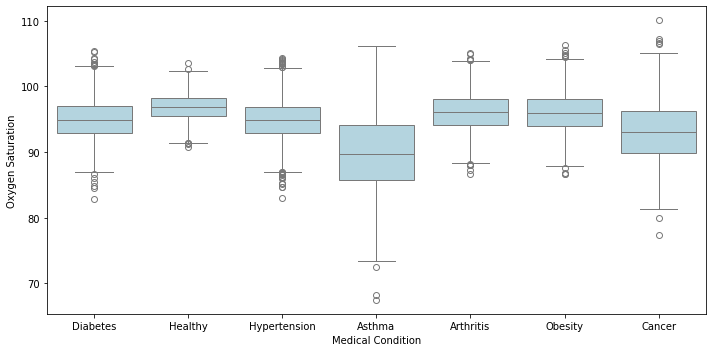

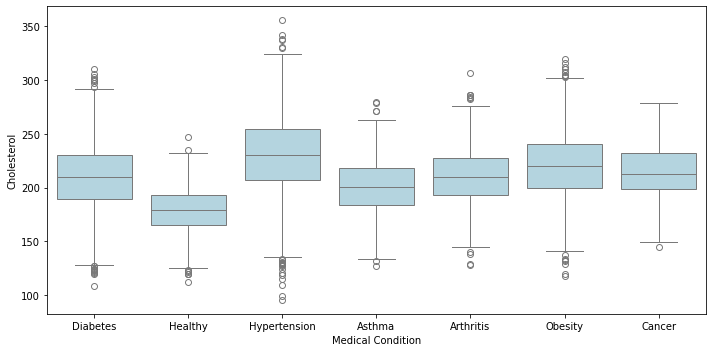

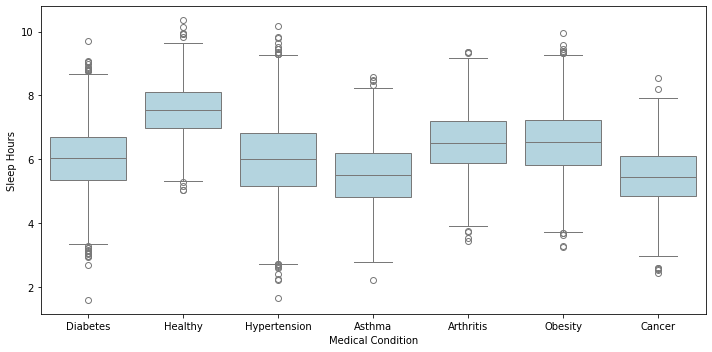

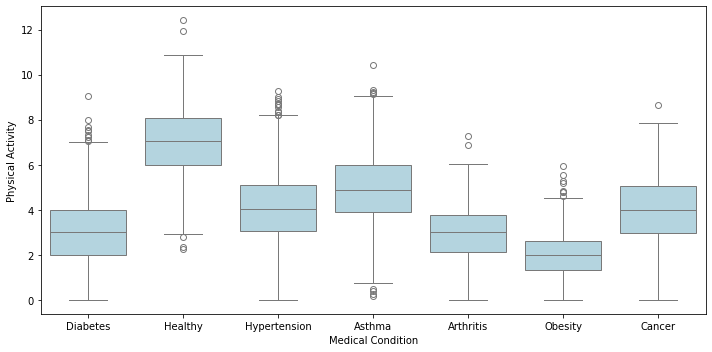

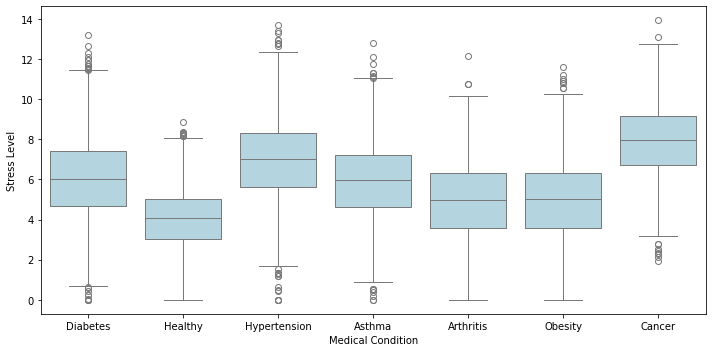

In [14]:
index = ['Age','Blood Pressure','Glucose','BMI','Oxygen Saturation','Cholesterol','Sleep Hours','Physical Activity','Stress Level']

for i in index:
    
    plt.figure(figsize = (10,5))
    sns.boxplot(data=df, x='Medical Condition', y=i, color='lightblue')
    plt.xlabel('Medical Condition')
    plt.ylabel(i)
    plt.tight_layout()
    plt.show()

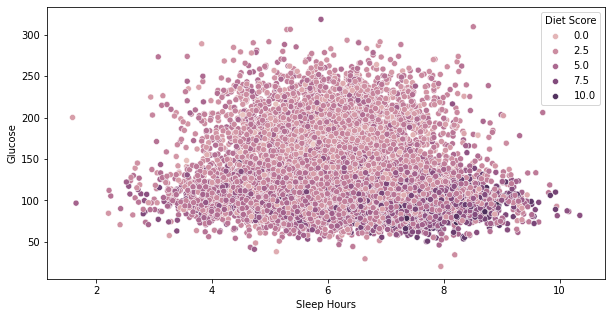

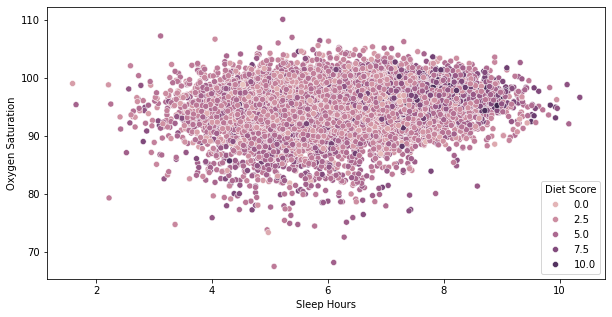

In [28]:
index = ['Glucose','Oxygen Saturation']

for i in index:
    plt.figure(figsize = (10,5))
    sns.scatterplot(data=df, x='Sleep Hours', y=i, hue= 'Diet Score')
    plt.xlabel('Sleep Hours')
    plt.ylabel(i)
    plt.show()


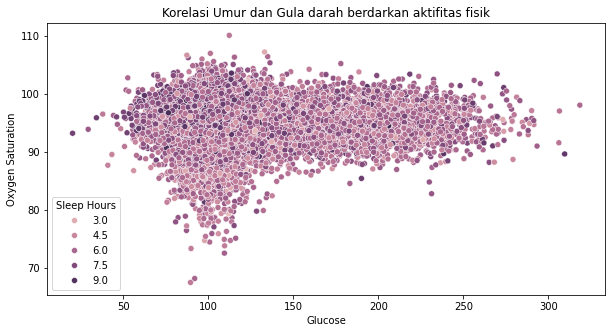

In [16]:
plt.figure(figsize = (10,5))
sns.scatterplot(data=df, x='Glucose', y='Oxygen Saturation', hue= 'Sleep Hours')
plt.xlabel('Glucose')
plt.ylabel('Oxygen Saturation')
plt.title('Korelasi Umur dan Gula darah berdarkan aktifitas fisik')
plt.show()

R² Linear: 0.400838749000629
R² Polynomial: 0.4021065887238011


R² Linear Regression: 0.401


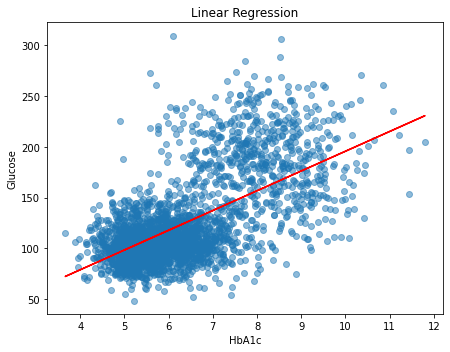

In [20]:
X = df[['HbA1c']]   # variabel input
y = df['Glucose']   # variabel target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)


r2_lin = r2_score(y_test, y_pred_lin)

print(f"R² Linear Regression: {r2_lin:.3f}")

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X_test, y_test, alpha=0.5)
plt.plot(X_test, y_pred_lin, color='red')
plt.title('Linear Regression')
plt.xlabel('HbA1c')
plt.ylabel('Glucose')


plt.tight_layout()
plt.show()
